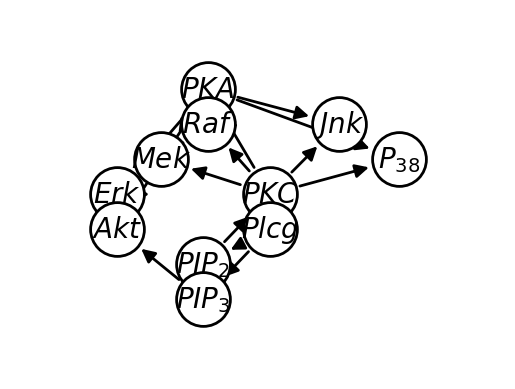

In [1]:
from eliater.examples import t_cell_signaling_example
from eliater.network_validation import print_graph_falsifications

graph = t_cell_signaling_example.graph
t_cell_signaling_example.graph.draw(prog="dot")

In [2]:
data = t_cell_signaling_example.data
data

,Raf,Mek,Plcg,PIP2,PIP3,Erk,Akt,PKA,PKC,P38,Jnk
0,"[1.61,39.52]","[1,24.8]","[1,24.8]","[1.11,23.3]","(45.3,764]","[1,25.3]","[1.7,39.6]","[1.95,547]","(8.06,106]","(25,170]","(35.9,343]"
1,"[1.61,39.52]","[1,24.8]","[1,24.8]","[1.11,23.3]","[1,45.3]","[1,25.3]","[1.7,39.6]","[1.95,547]","[1,8.06]","[1.53,25]","(35.9,343]"
2,"(39.52,552]","(24.8,389]","[1,24.8]","[1.11,23.3]","[1,45.3]","[1,25.3]","[1.7,39.6]","[1.95,547]","(8.06,106]","(25,170]","[1,35.9]"
3,"(39.52,552]","(24.8,389]","[1,24.8]","[1.11,23.3]","[1,45.3]","[1,25.3]","[1.7,39.6]","[1.95,547]","(8.06,106]","(25,170]","[1,35.9]"
4,"[1.61,39.52]","[1,24.8]","[1,24.8]","[1.11,23.3]","[1,45.3]","[1,25.3]","(39.6,3555]","[1.95,547]","[1,8.06]","(25,170]","(35.9,343]"
...,...,...,...,...,...,...,...,...,...,...,...
848,"(39.52,552]","(24.8,389]","[1,24.8]","(23.3,843]","[1,45.3]","[1,25.3]","[1.7,39.6]","(547,4491]","(8.06,106]","(25,170]","[1,35.9]"
849,"(39.52,552]","[1,24.8]","[1,24.8]","[1.11,23.3]","[1,45.3]","[1,25.3]","[1.7,39.6]","[1.95,547]","(8.06,106]","(25,170]","(35.9,343]"
850,"(39.52,552]","(24.8,389]","[1,24.8]","[1.11,23.3]","(45.3,764]","[1,25.3]","[1.7,39.6]","[1.95,547]","(8.06,106]","[1.53,25]","[1,35.9]"
851,"(39.52,552]","[1,24.8]","[1,24.8]","(23.3,843]","[1,45.3]","[1,25.3]","[1.7,39.6]","[1.95,547]","(8.06,106]","(25,170]","[1,35.9]"


In [3]:
lower_bounds_df = data.copy()
for c in lower_bounds_df.columns:
    lower_bounds_df[c] = lower_bounds_df[c].map(lambda x: float(x[1:-1].split(",")[0]))
lower_bounds_df.nunique()
lower_bounds_df

,Raf,Mek,Plcg,PIP2,PIP3,Erk,Akt,PKA,PKC,P38,Jnk
0,1.61,1.0,1.0,1.11,45.3,1.0,1.7,1.95,8.06,25.00,35.9
1,1.61,1.0,1.0,1.11,1.0,1.0,1.7,1.95,1.00,1.53,35.9
2,39.52,24.8,1.0,1.11,1.0,1.0,1.7,1.95,8.06,25.00,1.0
3,39.52,24.8,1.0,1.11,1.0,1.0,1.7,1.95,8.06,25.00,1.0
4,1.61,1.0,1.0,1.11,1.0,1.0,39.6,1.95,1.00,25.00,35.9
...,...,...,...,...,...,...,...,...,...,...,...
848,39.52,24.8,1.0,23.30,1.0,1.0,1.7,547.00,8.06,25.00,1.0
849,39.52,1.0,1.0,1.11,1.0,1.0,1.7,1.95,8.06,25.00,35.9
850,39.52,24.8,1.0,1.11,45.3,1.0,1.7,1.95,8.06,1.53,1.0
851,39.52,1.0,1.0,23.30,1.0,1.0,1.7,1.95,8.06,25.00,1.0


In [4]:
upper_bounds_df = data.copy()
for c in upper_bounds_df.columns:
    upper_bounds_df[c] = upper_bounds_df[c].map(lambda x: float(x[1:-1].split(",")[0]))
upper_bounds_df.nunique()
upper_bounds_df

,Raf,Mek,Plcg,PIP2,PIP3,Erk,Akt,PKA,PKC,P38,Jnk
0,1.61,1.0,1.0,1.11,45.3,1.0,1.7,1.95,8.06,25.00,35.9
1,1.61,1.0,1.0,1.11,1.0,1.0,1.7,1.95,1.00,1.53,35.9
2,39.52,24.8,1.0,1.11,1.0,1.0,1.7,1.95,8.06,25.00,1.0
3,39.52,24.8,1.0,1.11,1.0,1.0,1.7,1.95,8.06,25.00,1.0
4,1.61,1.0,1.0,1.11,1.0,1.0,39.6,1.95,1.00,25.00,35.9
...,...,...,...,...,...,...,...,...,...,...,...
848,39.52,24.8,1.0,23.30,1.0,1.0,1.7,547.00,8.06,25.00,1.0
849,39.52,1.0,1.0,1.11,1.0,1.0,1.7,1.95,8.06,25.00,35.9
850,39.52,24.8,1.0,1.11,45.3,1.0,1.7,1.95,8.06,1.53,1.0
851,39.52,1.0,1.0,23.30,1.0,1.0,1.7,1.95,8.06,25.00,1.0


In [5]:
print_graph_falsifications(graph, lower_bounds_df, verbose=True)

Failed tests: 18/35 (51.43%)
Reject null hypothesis when p<0.01
left right        given     stats            p  dof        p_adj  p_adj_significant
 Jnk  PIP2          PKC  0.361419 1.019648e-27 None 3.568769e-26               True
 Jnk   Raf      PKA|PKC  0.352040 2.732255e-26 None 9.289667e-25               True
PIP2   Raf          PKC  0.315209 3.944854e-21 None 1.301802e-19               True
 Mek  PIP2          PKC  0.262808 6.098299e-15 None 1.951456e-13               True
 Jnk   Mek      PKA|PKC  0.245920 3.240865e-13 None 1.004668e-11               True
 P38  PIP2          PKC  0.244268 4.706582e-13 None 1.411975e-11               True
 Jnk  Plcg          PKC  0.200660 3.376704e-09 None 9.792440e-08               True
 Jnk  PIP3          PKC  0.190376 2.102982e-08 None 5.888349e-07               True
PIP2   PKA          PKC  0.171043 5.027710e-07 None 1.357482e-05               True
 Jnk   P38      PKA|PKC  0.160952 2.304134e-06 None 5.990749e-05               True
 Erk   PKC  

In [6]:
print_graph_falsifications(graph, upper_bounds_df, verbose=True)

Failed tests: 18/35 (51.43%)
Reject null hypothesis when p<0.01
left right        given     stats            p  dof        p_adj  p_adj_significant
 Jnk  PIP2          PKC  0.361419 1.019648e-27 None 3.568769e-26               True
 Jnk   Raf      PKA|PKC  0.352040 2.732255e-26 None 9.289667e-25               True
PIP2   Raf          PKC  0.315209 3.944854e-21 None 1.301802e-19               True
 Mek  PIP2          PKC  0.262808 6.098299e-15 None 1.951456e-13               True
 Jnk   Mek      PKA|PKC  0.245920 3.240865e-13 None 1.004668e-11               True
 P38  PIP2          PKC  0.244268 4.706582e-13 None 1.411975e-11               True
 Jnk  Plcg          PKC  0.200660 3.376704e-09 None 9.792440e-08               True
 Jnk  PIP3          PKC  0.190376 2.102982e-08 None 5.888349e-07               True
PIP2   PKA          PKC  0.171043 5.027710e-07 None 1.357482e-05               True
 Jnk   P38      PKA|PKC  0.160952 2.304134e-06 None 5.990749e-05               True
 Erk   PKC  